In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


In [3]:
df.customer_age.describe()

count    1000.000000
mean       43.330000
std        12.858244
min        22.000000
25%        32.000000
50%        42.000000
75%        55.000000
max        65.000000
Name: customer_age, dtype: float64

### Create a heatmap showing average rating by customer_age group (bin age into 5-year groups like 18–22, 23–27, …) and region.

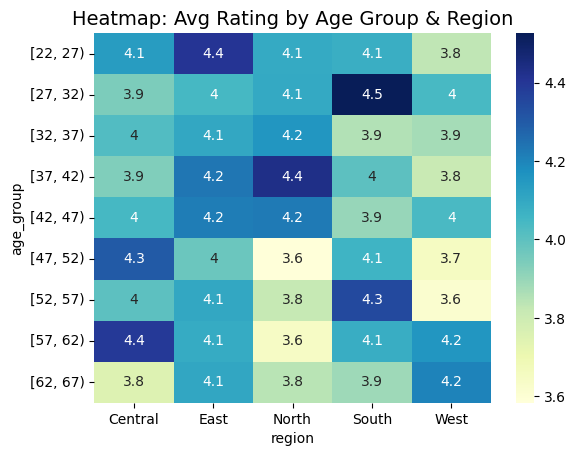

In [20]:
df['age_group']=pd.cut(df.customer_age,bins=range(df.customer_age.min(), df.customer_age.max() + 5, 5),right=False)

rating_pivot=df.pivot_table(
    index='age_group',
    columns='region',
    values='rating',
    aggfunc='mean',
    observed=False
)

sns.heatmap(
    rating_pivot,
    annot=True,
    cmap='YlGnBu'
)
plt.title('Heatmap: Avg Rating by Age Group & Region', fontsize=14)
plt.show()

In [24]:
df=df.drop('age_group',axis='columns')